**Imports, montagem do Drive e caminho dos dados**

In [1]:
# CÉLULA 1
# ============================================
# Imports básicos e configuração do ambiente
# ============================================

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", context="notebook")

# Ajuste o caminho se necessário (atenção ao acento da pasta)
DATA_DIR = r'C:\Users\User\Documents\Projetos\Prova_Prática_Case_On-line_(FIESC)\Prova_Prática_Case_On-line (FIESC)\Dados'

print("Arquivos encontrados em", DATA_DIR, ":")
print(os.listdir(DATA_DIR))

Arquivos encontrados em C:\Users\User\Documents\Projetos\Prova_Prática_Case_On-line_(FIESC)\Prova_Prática_Case_On-line (FIESC)\Dados :
['Classe_1.csv', 'Classe_2.csv', 'Classe_3.csv', 'Classe_4.csv', 'Classe_5.csv']


**Carregar as 5 classes e empilhar em um único DataFrame**

In [2]:
# CÉLULA 2
# ==========================================================
# Carregar todas as classes e empilhar em um único DataFrame
# ==========================================================

def carregar_dados_espectro(data_dir, n_classes=5):
    """
    Lê os arquivos Classe_1.csv ... Classe_n.csv
    e devolve um DataFrame único com uma coluna 'classe'.

    Como os equipamentos têm granularidades diferentes,
    alguns arquivos terão mais colunas que outros.
    Ao concatenar, pandas fará a união das colunas e
    preencherá com NaN onde não houver medição.
    """
    dfs = []
    for i in range(1, n_classes + 1):
        file_path = os.path.join(data_dir, f'Classe_{i}.csv')
        df = pd.read_csv(file_path, header=0)

        # Garante tipo numérico nas colunas de leitura
        df = df.apply(pd.to_numeric, errors='coerce')

        # Adiciona rótulo da classe
        df['classe'] = i

        dfs.append(df)
        print(f"Classe_{i}.csv carregado com formato: {df.shape}")

    df_all = pd.concat(dfs, ignore_index=True)
    return df_all

df_espectro = carregar_dados_espectro(DATA_DIR)

print("\nFormato total do dataset combinado:", df_espectro.shape)
display(df_espectro.head())

Classe_1.csv carregado com formato: (4958, 107)
Classe_2.csv carregado com formato: (3808, 98)
Classe_3.csv carregado com formato: (4425, 101)
Classe_4.csv carregado com formato: (2059, 97)
Classe_5.csv carregado com formato: (2983, 116)

Formato total do dataset combinado: (18233, 116)


,0,1,2,3,4,5,6,7,8,9,...,classe,106,107,108,109,110,111,112,113,114
0,120.836412,121.924483,123.549927,121.648326,122.055533,121.041289,121.968501,122.572668,122.917094,121.984940,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,120.372104,122.381749,121.651942,121.522012,120.635758,120.948607,120.872471,122.188351,120.832536,122.005928,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,122.578484,120.566182,122.893744,122.349360,121.230896,122.488196,124.183676,122.205222,121.734528,120.612049,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,122.464106,122.809070,122.104641,120.416596,120.636883,122.337557,123.553633,122.724864,122.264403,122.929589,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,122.936477,123.779065,124.095675,122.996179,123.798031,121.830380,121.745941,123.190652,121.745763,121.407239,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**ENTENDIMENTO DA ESTRUTURA DOS DADOS**

Estrutura geral, tipos e distribuição de classes

Formato do dataset (linhas, colunas): (18233, 116)

Tipos de dados por coluna:
0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8    float64
9    float64
dtype: object

Resumo do DataFrame (info):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18233 entries, 0 to 18232
Columns: 116 entries, 0 to 114
dtypes: float64(115), int64(1)
memory usage: 16.1 MB

Distribuição de amostras por classe:
classe
1    4958
2    3808
3    4425
4    2059
5    2983
Name: count, dtype: int64


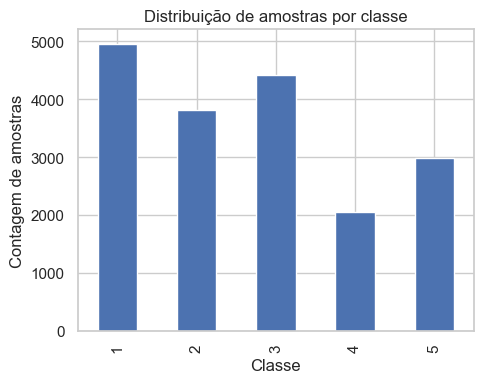

In [3]:
# CÉLULA 3
# ============================================
# Estrutura do dataset
# ============================================

print("Formato do dataset (linhas, colunas):", df_espectro.shape)

print("\nTipos de dados por coluna:")
print(df_espectro.dtypes.head(10))

print("\nResumo do DataFrame (info):")
df_espectro.info()

# Distribuição de classes
print("\nDistribuição de amostras por classe:")
print(df_espectro['classe'].value_counts().sort_index())

plt.figure(figsize=(5,4))
df_espectro['classe'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Classe")
plt.ylabel("Contagem de amostras")
plt.title("Distribuição de amostras por classe")
plt.tight_layout()
plt.show()

**Granularidade por classe (quantas colunas cada arquivo tem)**

Classe_1.csv -> 106 colunas (somente espectro)
Classe_2.csv -> 97 colunas (somente espectro)
Classe_3.csv -> 100 colunas (somente espectro)
Classe_4.csv -> 96 colunas (somente espectro)
Classe_5.csv -> 115 colunas (somente espectro)


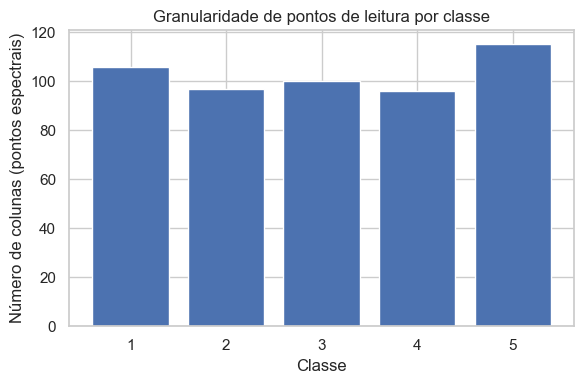

In [4]:
# CÉLULA 4
# =====================================================
# Conferindo o número de colunas de leitura por classe
# =====================================================

col_counts = {}
for i in range(1, 6):
    file_path = os.path.join(DATA_DIR, f'Classe_{i}.csv')
    df_temp = pd.read_csv(file_path)
    n_cols = df_temp.shape[1]
    col_counts[i] = n_cols
    print(f"Classe_{i}.csv -> {n_cols} colunas (somente espectro)")

plt.figure(figsize=(6,4))
plt.bar(col_counts.keys(), col_counts.values())
plt.xticks(list(col_counts.keys()))
plt.xlabel("Classe")
plt.ylabel("Número de colunas (pontos espectrais)")
plt.title("Granularidade de pontos de leitura por classe")
plt.tight_layout()
plt.show()


**QUALIDADE DOS DADOS**

Missing values (NaNs) – visão macro

In [5]:
# CÉLULA 5
# ============================================
# Análise de valores faltantes (NaNs)
# ============================================

feature_cols = [c for c in df_espectro.columns if c != 'classe']
df_feat = df_espectro[feature_cols]

total_nans = df_feat.isna().sum().sum()
rows_with_nan = df_feat.isna().any(axis=1).sum()

print(f"Total de valores NaN nas features: {total_nans}")
print(f"Linhas com pelo menos um NaN: {rows_with_nan} "
      f"({rows_with_nan/df_espectro.shape[0]*100:.2f}% do dataset)")

# Top 10 colunas mais problemáticas
col_nans = df_feat.isna().sum().sort_values(ascending=False)
print("\nTop 10 colunas com mais NaNs:")
print(col_nans.head(10))

# Percentual de amostras com NaN por classe
nan_por_classe = (
    df_espectro
    .groupby('classe')[feature_cols]
    .apply(lambda g: g.isna().any(axis=1).mean()*100)
)

print("\nPercentual de amostras com pelo menos 1 NaN por classe (%):")
print(nan_por_classe)

Total de valores NaN nas features: 218662
Linhas com pelo menos um NaN: 15250 (83.64% do dataset)

Top 10 colunas com mais NaNs:
114    15250
113    15250
112    15250
111    15250
110    15250
109    15250
108    15250
107    15250
106    15250
105    10292
dtype: int64

Percentual de amostras com pelo menos 1 NaN por classe (%):
classe
1    100.0
2    100.0
3    100.0
4    100.0
5      0.0
dtype: float64


**Visualização de missing values**

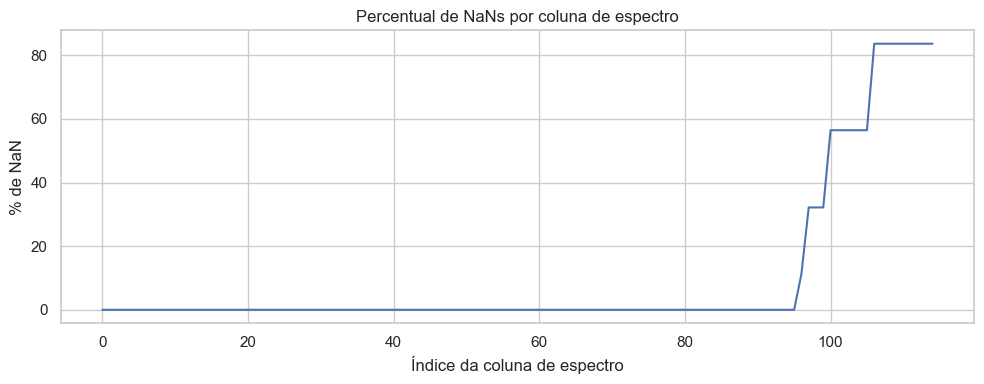

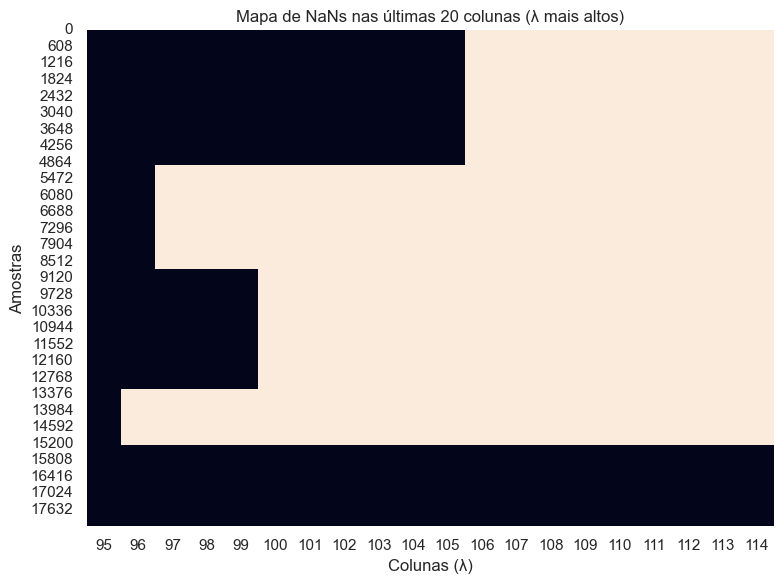

In [6]:
# CÉLULA 6
# ==================================================
# Visualização: percentuais de NaN por coluna + heatmap
# ==================================================

# Percentual de NaN por coluna
perc_nan = (df_feat.isna().sum() / df_espectro.shape[0]) * 100

plt.figure(figsize=(10,4))
plt.plot(range(len(feature_cols)), perc_nan.values)
plt.xlabel("Índice da coluna de espectro")
plt.ylabel("% de NaN")
plt.title("Percentual de NaNs por coluna de espectro")
plt.tight_layout()
plt.show()

# Foco nas últimas colunas (onde faltam leituras dos equipamentos menores)
cols_tail = feature_cols[-20:]

plt.figure(figsize=(8,6))
sns.heatmap(
    df_espectro[cols_tail].isna(),
    cbar=False
)
plt.title("Mapa de NaNs nas últimas 20 colunas (λ mais altos)")
plt.xlabel("Colunas (λ)")
plt.ylabel("Amostras")
plt.tight_layout()
plt.show()


**Linhas duplicadas**

In [7]:
# CÉLULA 7
# ============================================
# Verificando linhas duplicadas
# ============================================

num_duplicadas = df_espectro.duplicated().sum()
print(f"Número de linhas completamente duplicadas: {num_duplicadas}")

if num_duplicadas > 0:
    df_espectro = df_espectro.drop_duplicates()
    print("Duplicadas removidas. Novo formato:", df_espectro.shape)


Número de linhas completamente duplicadas: 0


**ESTATÍSTICAS DESCRITIVAS E DISTRIBUIÇÕES**

Estatísticas globais das features

In [8]:
# CÉLULA 8
# ============================================
# Estatísticas descritivas das features numéricas
# ============================================

desc_global = df_feat.describe().T  # uma linha por coluna de λ
print("Resumo estatístico das features (primeiras 10 linhas):")
display(desc_global.head(10))

# Estatísticas por classe (média da média, só para ter ideia)
estat_por_amostra = pd.DataFrame({
    'classe': df_espectro['classe'],
    'media_intensidade': df_feat.mean(axis=1),
    'std_intensidade': df_feat.std(axis=1)
})

print("\nEstatísticas agregadas da média de intensidade por classe:")
display(estat_por_amostra.groupby('classe')['media_intensidade'].describe())

Resumo estatístico das features (primeiras 10 linhas):


,count,mean,std,min,25%,50%,75%,max
0,18233.0,121.581946,4.376849,111.445687,120.198286,121.756427,123.004633,132.248486
1,18233.0,121.595946,4.371741,111.621750,120.225559,121.762488,123.018459,132.289377
2,18233.0,121.578479,4.371603,111.653579,120.205371,121.734682,122.995265,132.428744
3,18233.0,121.571222,4.381215,110.896420,120.172308,121.728630,123.005522,132.104655
4,18233.0,121.566408,4.389209,111.210307,120.200141,121.710362,122.982515,132.907825
5,18233.0,121.577682,4.377836,111.650892,120.172451,121.734006,122.980126,133.411390
6,18233.0,121.566905,4.388607,111.404976,120.175259,121.728116,122.971784,133.032546
7,18233.0,121.571909,4.381414,111.518037,120.191325,121.746296,122.973845,132.901466
8,18233.0,121.564451,4.377118,111.819586,120.199864,121.740941,122.946283,132.428803
9,18233.0,121.575003,4.371800,111.065363,120.168182,121.748038,123.003746,132.389771



Estatísticas agregadas da média de intensidade por classe:


,count,mean,std,min,25%,50%,75%,max
classe,,,,,,,,
1,4958.0,121.998039,0.096341,121.666253,121.933046,121.997623,122.063240,122.327710
2,3808.0,115.001979,0.101616,114.567114,114.932689,115.004407,115.072141,115.380194
3,4425.0,121.999682,0.099124,121.615151,121.933841,121.998799,122.066884,122.332233
4,2059.0,121.003207,0.100357,120.649673,120.935025,120.999262,121.071700,121.353806
5,2983.0,128.999787,0.093999,128.717969,128.937017,129.000674,129.066350,129.279824


**Distribuição da média de intensidade por classe**

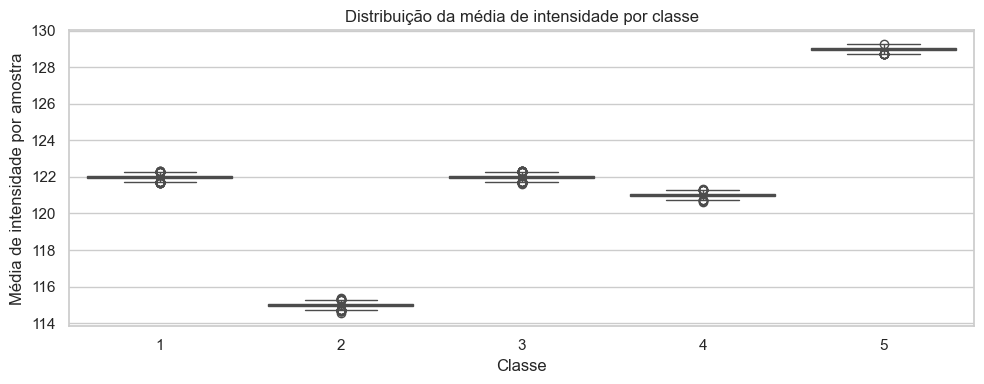

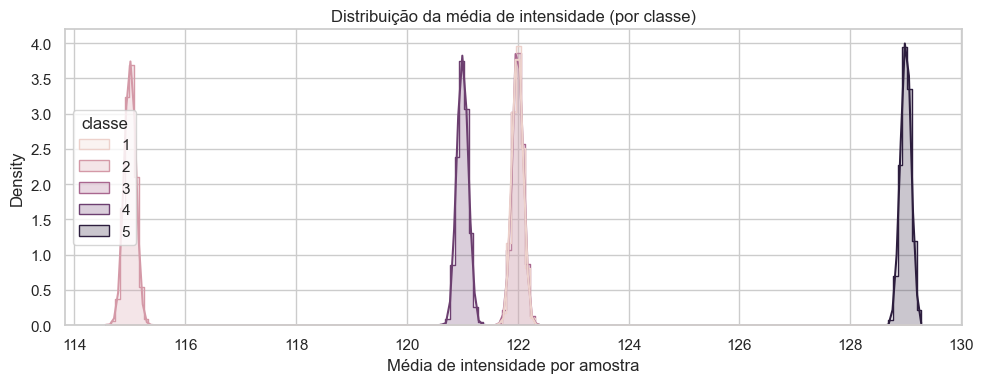

In [9]:
# CÉLULA 9
# ===========================================================
# Distribuição da média de intensidade por amostra e por classe
# ===========================================================

plt.figure(figsize=(10,4))

sns.boxplot(
    data=estat_por_amostra,
    x='classe',
    y='media_intensidade'
)
plt.xlabel("Classe")
plt.ylabel("Média de intensidade por amostra")
plt.title("Distribuição da média de intensidade por classe")
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,4))
sns.histplot(
    data=estat_por_amostra,
    x='media_intensidade',
    hue='classe',
    kde=True,
    element='step',
    stat='density',
    common_norm=False
)
plt.xlabel("Média de intensidade por amostra")
plt.title("Distribuição da média de intensidade (por classe)")
plt.tight_layout()
plt.show()


**ANÁLISE ESPECTRAL (univariada + bivariada com a classe)**

Construir eixo de comprimento de onda

In [10]:
# CÉLULA 10
# ============================================
# Vetor de comprimentos de onda (nm)
# ============================================

n_pontos = len(feature_cols)
wl_min, wl_max = 780, 1080

wavelengths = np.linspace(wl_min, wl_max, n_pontos)

print("Primeiros 5 λ:", wavelengths[:5])
print("Últimos 5 λ:", wavelengths[-5:])
print("Total de λ:", len(wavelengths))


Primeiros 5 λ: [780.         782.63157895 785.26315789 787.89473684 790.52631579]
Últimos 5 λ: [1069.47368421 1072.10526316 1074.73684211 1077.36842105 1080.        ]
Total de λ: 115


**Curvas médias do espectro por classe**

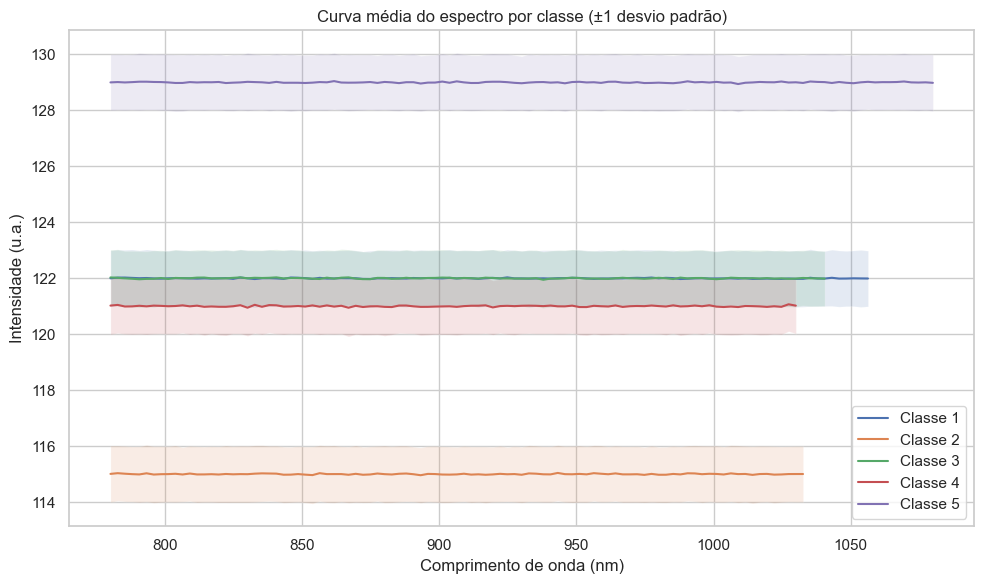

In [11]:
# CÉLULA 11
# ============================================================
# Curva média do espectro por classe (±1 desvio padrão)
# ============================================================

plt.figure(figsize=(10,6))

for c in sorted(df_espectro['classe'].unique()):
    df_c = df_espectro[df_espectro['classe'] == c][feature_cols]
    mean_spectrum = df_c.mean(axis=0).values
    std_spectrum  = df_c.std(axis=0).values

    plt.plot(wavelengths, mean_spectrum, label=f'Classe {c}')
    plt.fill_between(
        wavelengths,
        mean_spectrum - std_spectrum,
        mean_spectrum + std_spectrum,
        alpha=0.15
    )

plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("Intensidade (u.a.)")
plt.title("Curva média do espectro por classe (±1 desvio padrão)")
plt.legend()
plt.tight_layout()
plt.show()


**Boxplots em λ específicos**

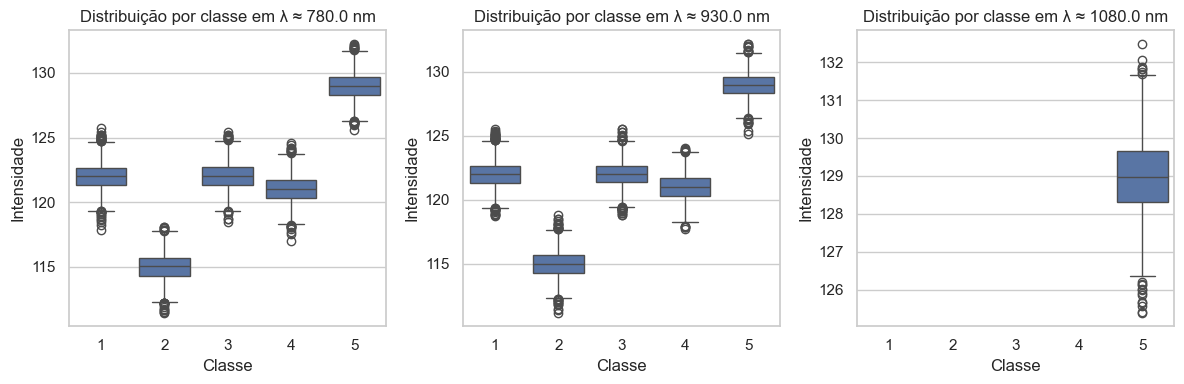

In [12]:
# CÉLULA 12
# ======================================================
# Boxplots comparando classes em alguns λ específicos
# ======================================================

indices_escolhidos = [0, n_pontos // 2, n_pontos - 1]  # início, meio, fim

plt.figure(figsize=(12,4))

for idx_plot, col_idx in enumerate(indices_escolhidos, start=1):
    col_name = feature_cols[col_idx]
    lambda_nm = wavelengths[col_idx]

    plt.subplot(1, 3, idx_plot)
    sns.boxplot(
        data=df_espectro,
        x='classe',
        y=col_name
    )
    plt.xlabel("Classe")
    plt.ylabel("Intensidade")
    plt.title(f"Distribuição por classe em λ ≈ {lambda_nm:.1f} nm")

plt.tight_layout()
plt.show()


**KDE em um λ “intermediário”**

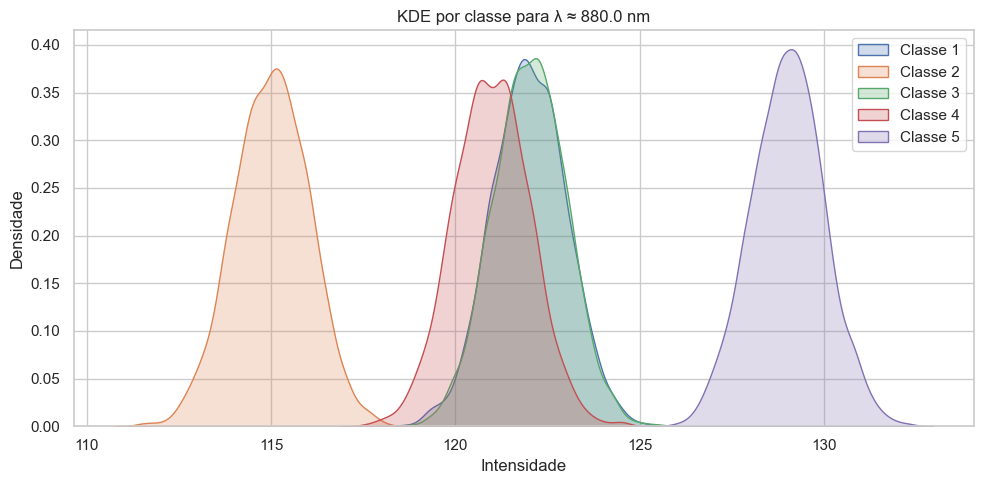

In [13]:
# CÉLULA 13
# =======================================================
# KDE por classe para um λ intermediário
# =======================================================

col_idx = n_pontos // 3   # λ ~ 1/3 do caminho
col_name = feature_cols[col_idx]
lambda_nm = wavelengths[col_idx]

plt.figure(figsize=(10,5))
for c in sorted(df_espectro['classe'].unique()):
    sns.kdeplot(
        df_espectro[df_espectro['classe'] == c][col_name],
        label=f'Classe {c}',
        fill=True,
        alpha=0.25
    )

plt.xlabel("Intensidade")
plt.ylabel("Densidade")
plt.title(f"KDE por classe para λ ≈ {lambda_nm:.1f} nm")
plt.legend()
plt.tight_layout()
plt.show()


**CORRELAÇÃO (multivariado) – com visual bacana**

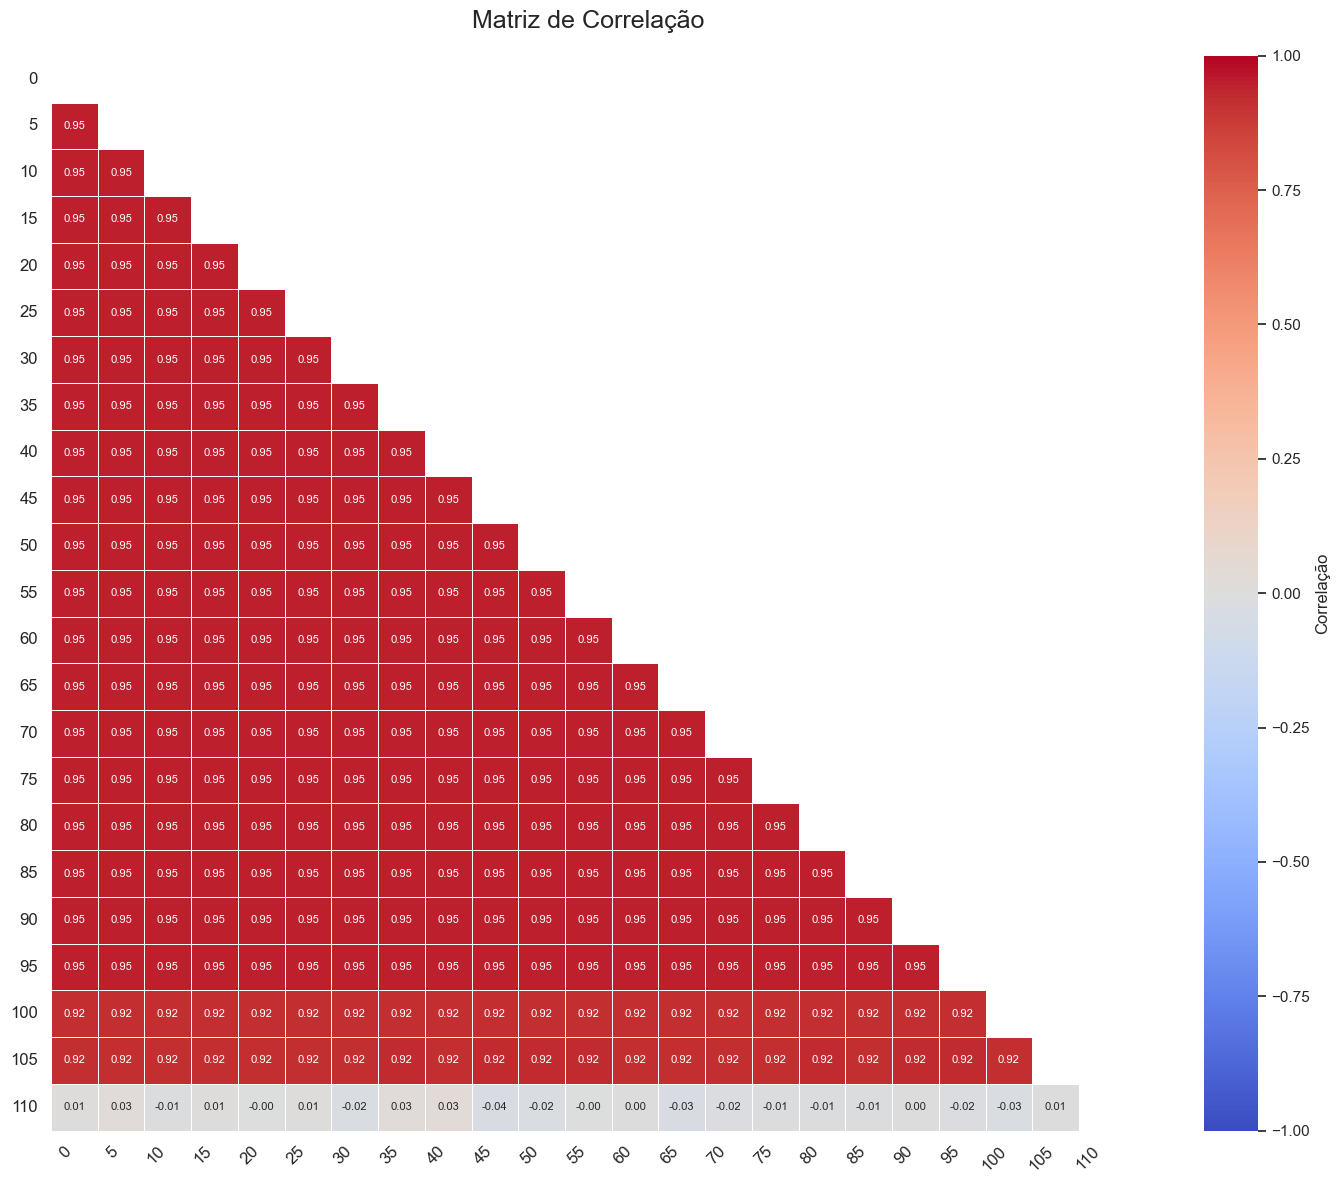

In [14]:
# CÉLULA 14
# ==================================================
# Matriz de correlação entre alguns λ do espectro
# ==================================================

# Subconjunto dos comprimentos de onda
subset_cols = feature_cols[::5]

# Matriz de correlação
corr = df_espectro[subset_cols].corr()

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(16,12))
sns.set(style="white")

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(
    corr,
    mask=mask,
    cmap='coolwarm',
    annot=True,
    fmt=".2f",
    annot_kws={"size": 8},
    vmin=-1, vmax=1,
    square=True,
    linewidths=0.5,
    cbar_kws={"label": "Correlação"}
)

plt.title("Matriz de Correlação", fontsize=18, pad=20)

# Força os labels a aparecerem corretamente
ax.set_xticks(np.arange(len(subset_cols)) + 0.5)
ax.set_yticks(np.arange(len(subset_cols)) + 0.5)

ax.set_xticklabels(subset_cols, rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(subset_cols, rotation=0, fontsize=12)

plt.tight_layout()
plt.show()

Análise multivariada com tratamento de NaN
**negrito**



PCA 2D com imputação

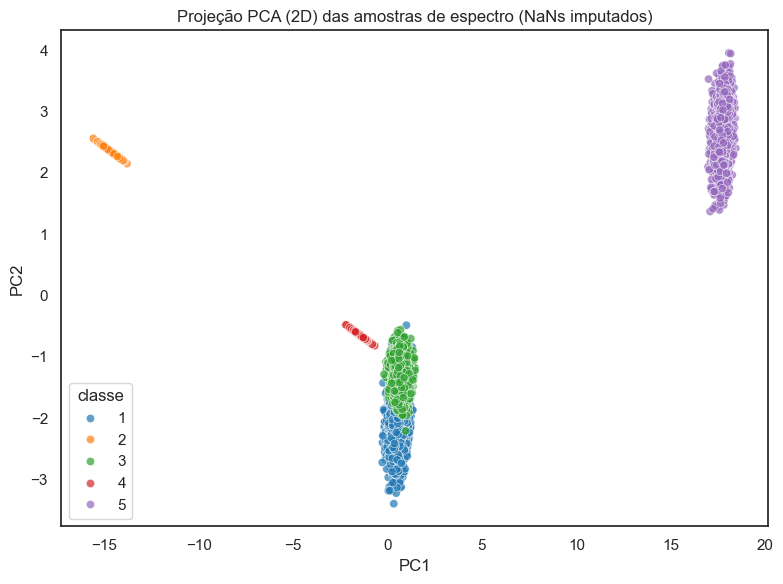

Variância explicada por PC1 e PC2: [0.8394416  0.03311129]


In [15]:
# CÉLULA 15
# ===========================================
# PCA 2D com imputação de NaNs
# ===========================================

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

X = df_espectro[feature_cols].values
y = df_espectro['classe'].values

# 1) Imputação dos NaNs (mediana por coluna)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# 2) Escalonamento
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# 3) PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'classe': y
})

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca,
    x='PC1', y='PC2',
    hue='classe',
    palette='tab10',
    alpha=0.7
)
plt.title("Projeção PCA (2D) das amostras de espectro (NaNs imputados)")
plt.tight_layout()
plt.show()

print("Variância explicada por PC1 e PC2:", pca.explained_variance_ratio_)

**Importância dos λ via ANOVA F-score**

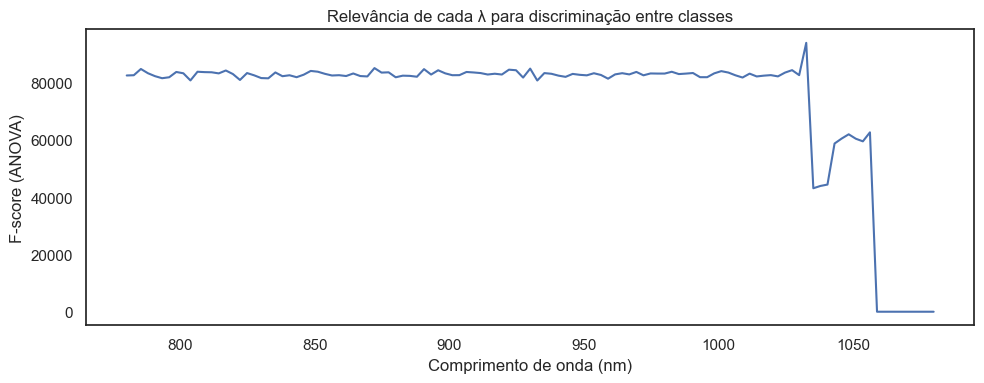

In [16]:
# CÉLULA 16 (OPCIONAL)
# =====================================================
# Relevância de cada λ para separar as classes (F-score)
# =====================================================

from sklearn.feature_selection import f_classif

# Usa X_imputed (já sem NaNs)
F_scores, p_values = f_classif(X_imputed, y)

plt.figure(figsize=(10,4))
plt.plot(wavelengths, F_scores)
plt.xlabel("Comprimento de onda (nm)")
plt.ylabel("F-score (ANOVA)")
plt.title("Relevância de cada λ para discriminação entre classes")
plt.tight_layout()
plt.show()


**MODELAGEM**

Instalar bibliotecas extras

In [17]:
# CÉLULA 0
# ============================================
# Instalação de bibliotecas adicionais
# ============================================

!pip install -q xgboost lightgbm catboost hdbscan

**Definir X, y e dividir treino/teste**

In [18]:
# CÉLULA 1 (NOVA)
# ============================================
# Preparação dos dados com codificação de classes 0..4
# Necessário para modelos como XGBoost, LightGBM, CatBoost
# ============================================

import numpy as np
from sklearn.model_selection import train_test_split

# Colunas de features (todas exceto 'classe')
feature_cols = [c for c in df_espectro.columns if c != 'classe']

# Mapeia classes originais -> índices 0..(n_classes-1)
classes_orig = np.sort(df_espectro['classe'].unique())
class_to_idx = {c: i for i, c in enumerate(classes_orig)}
idx_to_class = {i: c for c, i in class_to_idx.items()}

print("Mapeamento de classes (original -> índice):", class_to_idx)

# y codificado em 0..4
y_encoded = df_espectro['classe'].map(class_to_idx).values

# Matriz de features
X = df_espectro[feature_cols].values

# Split estratificado
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    random_state=42,
    stratify=y_encoded
)

print("Formato X_train:", X_train.shape)
print("Formato X_test :", X_test.shape)
print("Distribuição de classes (índices) no treino:", np.bincount(y_train))
print("Distribuição de classes (índices) no teste :", np.bincount(y_test))

Mapeamento de classes (original -> índice): {1: 0, 2: 1, 3: 2, 4: 3, 5: 4}
Formato X_train: (14586, 115)
Formato X_test : (3647, 115)
Distribuição de classes (índices) no treino: [3966 3046 3540 1647 2387]
Distribuição de classes (índices) no teste : [992 762 885 412 596]


**Pipeline de pré-processamento (imputação + escala)**

In [19]:
# CÉLULA 2
# ============================================
# Pré-processamento:
# - Imputação de NaNs (mediana por coluna)
# - Escalonamento (StandardScaler)
# ============================================

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

preprocess_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Teste rápido
X_train_prep = preprocess_pipeline.fit_transform(X_train)
X_test_prep  = preprocess_pipeline.transform(X_test)

print("Formas após pré-processamento:", X_train_prep.shape, X_test_prep.shape)
print("NaNs restantes em X_train_prep:", np.isnan(X_train_prep).sum())

Formas após pré-processamento: (14586, 115) (3647, 115)
NaNs restantes em X_train_prep: 0


**Modelos supervisionados (vários)**

In [20]:
# CÉLULA 3
# ============================================
# Definição dos modelos supervisonados
# ============================================

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

modelos_supervisionados = {
    "LogisticRegression": LogisticRegression(
        multi_class='multinomial',
        solver='lbfgs',
        max_iter=500,
        n_jobs=-1
    ),
    "GaussianNB": GaussianNB(),
    "DecisionTree": DecisionTreeClassifier(
        max_depth=None,
        random_state=42
    ),
    "RandomForest": RandomForestClassifier(
        n_estimators=300,
        max_depth=None,
        random_state=42,
        n_jobs=-1
    ),
    "AdaBoost": AdaBoostClassifier(
        n_estimators=200,
        learning_rate=0.8,
        random_state=42
    ),
    "GradientBoosting": GradientBoostingClassifier(
        n_estimators=200,
        learning_rate=0.1,
        random_state=42
    ),
    "XGBoost": XGBClassifier(
        n_estimators=300,
        max_depth=6,
        learning_rate=0.1,
        subsample=0.8,
        colsample_bytree=0.8,
        objective='multi:softmax',
        num_class=5,
        tree_method='hist',
        eval_metric='mlogloss',
        random_state=42,
        n_jobs=-1
    ),
    "LightGBM": LGBMClassifier(
        n_estimators=400,
        learning_rate=0.1,
        max_depth=-1,
        subsample=0.9,
        colsample_bytree=0.9,
        random_state=42,
        n_jobs=-1
    ),
    "CatBoost": CatBoostClassifier(
        iterations=400,
        learning_rate=0.1,
        depth=6,
        loss_function='MultiClass',
        verbose=0,
        random_seed=42
    ),
    "KNN": KNeighborsClassifier(
        n_neighbors=7,
        weights='distance',
        metric='euclidean'
    ),
    "SVM_RBF": SVC(
        kernel='rbf',
        C=10,
        gamma='scale',
        probability=False
    )
}

print("Modelos supervisionados definidos:")
for name in modelos_supervisionados.keys():
    print("-", name)

Modelos supervisionados definidos:
- LogisticRegression
- GaussianNB
- DecisionTree
- RandomForest
- AdaBoost
- GradientBoosting
- XGBoost
- LightGBM
- CatBoost
- KNN
- SVM_RBF


**Validação cruzada para todos os modelos supervisionados**

In [21]:
from sklearn.model_selection import StratifiedKFold, cross_validate
import pandas as pd

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# dicionário de métricas para multiclasse
scoring = {
    'accuracy': 'accuracy',
    'precision_macro': 'precision_macro',
    'recall_macro': 'recall_macro',
    'f1_macro': 'f1_macro'
}

resultados_sup = []

for nome, modelo in modelos_supervisionados.items():
    print(f"\nAvaliando modelo: {nome}")

    # Pipeline completo: pré-processamento + modelo
    pipe = Pipeline(steps=[
        ('prep', preprocess_pipeline),
        ('clf', modelo)
    ])

    scores = cross_validate(
        pipe,
        X_train, y_train,
        cv=cv,
        scoring=scoring,
        n_jobs=-1
    )

    resultados_sup.append({
        'modelo': nome,
        'acc_media': scores['test_accuracy'].mean(),
        'acc_std': scores['test_accuracy'].std(),
        'prec_macro_media': scores['test_precision_macro'].mean(),
        'prec_macro_std': scores['test_precision_macro'].std(),
        'recall_macro_media': scores['test_recall_macro'].mean(),
        'recall_macro_std': scores['test_recall_macro'].std(),
        'f1_macro_media': scores['test_f1_macro'].mean(),
        'f1_macro_std': scores['test_f1_macro'].std()
    })

resultados_sup_df = pd.DataFrame(resultados_sup).sort_values(
    by='f1_macro_media', ascending=False
).reset_index(drop=True)

display(resultados_sup_df)


Avaliando modelo: LogisticRegression

Avaliando modelo: GaussianNB

Avaliando modelo: DecisionTree

Avaliando modelo: RandomForest

Avaliando modelo: AdaBoost

Avaliando modelo: GradientBoosting

Avaliando modelo: XGBoost

Avaliando modelo: LightGBM

Avaliando modelo: CatBoost

Avaliando modelo: KNN

Avaliando modelo: SVM_RBF


,modelo,acc_media,acc_std,prec_macro_media,prec_macro_std,recall_macro_media,recall_macro_std,f1_macro_media,f1_macro_std
0,GaussianNB,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
1,RandomForest,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
2,XGBoost,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
3,LightGBM,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
4,CatBoost,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
5,GradientBoosting,0.999863,0.000168,0.999878,0.000150,0.999813,0.000246,0.999845,0.000196
6,DecisionTree,0.999314,0.000376,0.999140,0.000575,0.999275,0.000381,0.999206,0.000447
7,SVM_RBF,0.986014,0.001493,0.989109,0.001097,0.989712,0.001100,0.989119,0.001160
8,LogisticRegression,0.984711,0.000885,0.988150,0.000646,0.988754,0.000654,0.988107,0.000689
9,KNN,0.924380,0.004392,0.952516,0.002086,0.944377,0.003229,0.940728,0.003540


**Gráfico de desempenho dos modelos supervisionados**

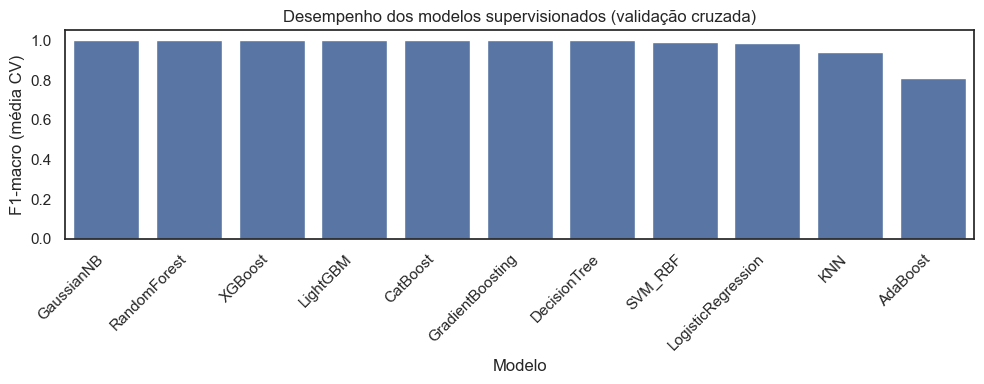

In [23]:
# CÉLULA 5
# ============================================
# Visualização do desempenho (F1-macro) por modelo
# ============================================

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,4))
sns.barplot(
    data=resultados_sup_df,
    x='modelo',
    y='f1_macro_media'  # <-- nome certo da coluna
)
plt.ylabel("F1-macro (média CV)")
plt.xlabel("Modelo")
plt.title("Desempenho dos modelos supervisionados (validação cruzada)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**Treinar todos os modelos no treino e avaliar no teste**

In [24]:
# CÉLULA 6A
# ==================================================
# Treinar TODOS os modelos supervisionados no treino
# e avaliar TODOS no conjunto de teste
# Métricas: acc, precision_macro, recall_macro, f1_macro
# ==================================================

from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

resultados_test = []
pipelines_treinados = {}  # para guardar os pipelines treinados

for nome, modelo in modelos_supervisionados.items():
    print(f"\nTreinando e avaliando modelo no teste: {nome}")
    
    # Pipeline completo: pré-processamento + modelo
    pipe = Pipeline(steps=[
        ('prep', preprocess_pipeline),
        ('clf', modelo)
    ])
    
    # Treina no conjunto de treino completo
    pipe.fit(X_train, y_train)
    
    # Guarda o pipeline treinado (para usar depois)
    pipelines_treinados[nome] = pipe
    
    # Predição no conjunto de teste
    y_pred = pipe.predict(X_test)
    
    # Métricas no teste
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)
    
    resultados_test.append({
        'modelo': nome,
        'acc_test': acc,
        'precision_macro_test': prec,
        'recall_macro_test': rec,
        'f1_macro_test': f1
    })

# DataFrame com o desempenho de TODOS os modelos no teste
resultados_test_df = pd.DataFrame(resultados_test).sort_values(
    by='f1_macro_test',
    ascending=False
).reset_index(drop=True)

print("\nDesempenho dos modelos no conjunto de teste:")
display(resultados_test_df)


Treinando e avaliando modelo no teste: LogisticRegression


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Treinando e avaliando modelo no teste: GaussianNB

Treinando e avaliando modelo no teste: DecisionTree

Treinando e avaliando modelo no teste: RandomForest

Treinando e avaliando modelo no teste: AdaBoost

Treinando e avaliando modelo no teste: GradientBoosting

Treinando e avaliando modelo no teste: XGBoost

Treinando e avaliando modelo no teste: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002808 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 29325
[LightGBM] [Info] Number of data points in the train set: 14586, number of used features: 115
[LightGBM] [Info] Start training from score -1.302304
[LightGBM] [Info] Start training from score -1.566233
[LightGBM] [Info] Start training from score -1.415935
[LightGBM] [Info] Start training from score -2.181107
[LightGBM] [Info] Start training from score -1.810025
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Lig

c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(



Treinando e avaliando modelo no teste: CatBoost

Treinando e avaliando modelo no teste: KNN

Treinando e avaliando modelo no teste: SVM_RBF

Desempenho dos modelos no conjunto de teste:


,modelo,acc_test,precision_macro_test,recall_macro_test,f1_macro_test
0,GaussianNB,1.000000,1.000000,1.000000,1.000000
1,RandomForest,1.000000,1.000000,1.000000,1.000000
2,GradientBoosting,1.000000,1.000000,1.000000,1.000000
3,XGBoost,1.000000,1.000000,1.000000,1.000000
4,LightGBM,1.000000,1.000000,1.000000,1.000000
5,CatBoost,1.000000,1.000000,1.000000,1.000000
6,DecisionTree,0.999452,0.999034,0.999512,0.999271
7,SVM_RBF,0.987113,0.989914,0.990524,0.989974
8,LogisticRegression,0.984645,0.988098,0.988710,0.988057
9,KNN,0.928434,0.954450,0.947379,0.944002


Detalhar o melhor modelo no teste (relatório + matriz de confusão)

Melhor modelo no CONJUNTO DE TESTE (F1-macro): GaussianNB
modelo                  GaussianNB
acc_test                       1.0
precision_macro_test           1.0
recall_macro_test              1.0
f1_macro_test                  1.0
Name: 0, dtype: object

Relatório de classificação no conjunto de teste:
              precision    recall  f1-score   support

    Classe 1     1.0000    1.0000    1.0000       992
    Classe 2     1.0000    1.0000    1.0000       762
    Classe 3     1.0000    1.0000    1.0000       885
    Classe 4     1.0000    1.0000    1.0000       412
    Classe 5     1.0000    1.0000    1.0000       596

    accuracy                         1.0000      3647
   macro avg     1.0000    1.0000    1.0000      3647
weighted avg     1.0000    1.0000    1.0000      3647



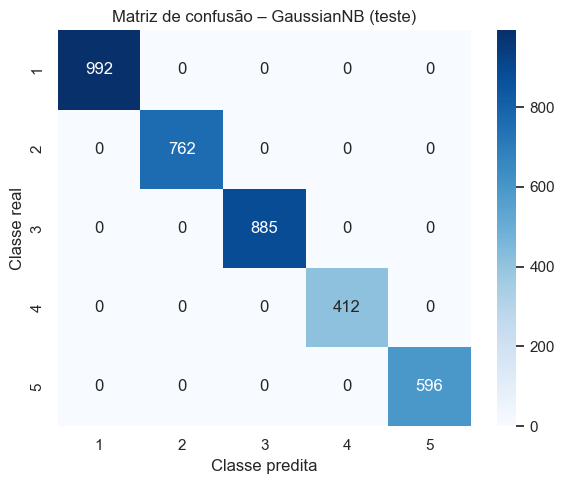

In [25]:
# CÉLULA 6B
# ==================================================
# Detalhar o MELHOR modelo no TESTE
# - Classification report por classe
# - Matriz de confusão
# ==================================================

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Seleciona o melhor modelo pelo F1-macro no teste
best_row_test = resultados_test_df.iloc[0]
best_name_test = best_row_test['modelo']

print(f"Melhor modelo no CONJUNTO DE TESTE (F1-macro): {best_name_test}")
print(best_row_test)

# Recupera o pipeline treinado correspondente
best_sup_pipeline = pipelines_treinados[best_name_test]

# Predição no conjunto de teste
y_pred_test = best_sup_pipeline.predict(X_test)

# Nomes das classes originais (para o relatório ficar amigável)
target_names = [f"Classe {c}" for c in classes_orig]

print("\nRelatório de classificação no conjunto de teste:")
print(classification_report(
    y_test,
    y_pred_test,
    target_names=target_names,
    digits=4
))

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred_test)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=classes_orig,  # mostra 1..5 no eixo
    yticklabels=classes_orig
)
plt.xlabel("Classe predita")
plt.ylabel("Classe real")
plt.title(f"Matriz de confusão – {best_name_test} (teste)")
plt.tight_layout()
plt.show()

**Salvar o pipeline vencedor (PoC supervisionada)**

In [26]:
# CÉLULA 7
# ============================================
# Salvar o pipeline com o melhor modelo supervisionado
# ============================================

import joblib, os

model_path = r"C:\Users\User\Documents\Projetos\Prova_Prática_Case_On-line_(FIESC)\Prova_Prática_Case_On-line (FIESC)\Modelos\Melhor-Modelo/pipeline_espectro_macas_best.pkl"
os.makedirs(os.path.dirname(model_path), exist_ok=True)

joblib.dump(best_sup_pipeline, model_path)
print(f"Pipeline salvo em: {model_path}")

Pipeline salvo em: C:\Users\User\Documents\Projetos\Prova_Prática_Case_On-line_(FIESC)\Prova_Prática_Case_On-line (FIESC)\Modelos\Melhor-Modelo/pipeline_espectro_macas_best.pkl


In [27]:
# CÉLULA 8
# ============================================
# Preparação dos dados para clustering:
# - Pré-processamento em TODO o dataset
# - Redução de dimensionalidade com PCA
# ============================================

from sklearn.decomposition import PCA

# Pré-processa todos os dados de uma vez
X_all = df_espectro[feature_cols].values
y_all = df_espectro['classe'].values

X_all_prep = preprocess_pipeline.fit_transform(X_all)

# PCA para reduzir para 10 dimensões (facilita clustering)
pca_clust = PCA(n_components=10, random_state=42)
X_all_pca = pca_clust.fit_transform(X_all_prep)

print("Formato pós-PCA para clustering:", X_all_pca.shape)
print("Variância explicada acumulada pelos 10 PCs:",
      pca_clust.explained_variance_ratio_.sum())

Formato pós-PCA para clustering: (18233, 10)
Variância explicada acumulada pelos 10 PCs: 0.9428712009290948


**Parte não supervisionada – clustering**

**Definir algoritmos de clustering**

In [28]:
# CÉLULA 9
# ============================================
# Definição dos algoritmos de clustering
# ============================================

from sklearn.cluster import KMeans, AgglomerativeClustering, MeanShift, DBSCAN
import hdbscan

clustering_algos = {
    "KMeans_k5": KMeans(
        n_clusters=5,
        random_state=42,
        n_init=10
    ),
    "Agglomerative_k5": AgglomerativeClustering(
        n_clusters=5,
        linkage='ward'
    ),
    "MeanShift": MeanShift(),  # descobre número de clusters automaticamente
    "DBSCAN": DBSCAN(
        eps=0.8,
        min_samples=30
    ),
    "HDBSCAN": hdbscan.HDBSCAN(
        min_cluster_size=100,
        min_samples=20
    )
}

print("Algoritmos de clustering definidos:")
for name in clustering_algos.keys():
    print("-", name)

Algoritmos de clustering definidos:
- KMeans_k5
- Agglomerative_k5
- MeanShift
- DBSCAN
- HDBSCAN


**Avaliar clustering (ARI + silhouette)**

In [29]:
# CÉLULA 10
# ==================================================
# Execução e avaliação dos algoritmos de clustering
# Métricas:
# - ARI (Adjusted Rand Index) comparando clusters com classes reais
# - Silhouette (qualidade dos clusters, sem usar rótulos)
# ==================================================

from sklearn.metrics import adjusted_rand_score, silhouette_score
import numpy as np
import pandas as pd

resultados_clust = []

for nome, algo in clustering_algos.items():
    print(f"\nRodando clustering: {nome}")
    labels = algo.fit_predict(X_all_pca)

    # Número efetivo de clusters (descontando rótulo -1 de ruído, se houver)
    unique_labels = set(labels)
    n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

    # ARI (usa rótulos verdadeiros só para avaliar)
    ari = adjusted_rand_score(y_all, labels)

    # Silhouette: só faz sentido se houver pelo menos 2 clusters
    # e desconsiderando ruído (-1)
    if n_clusters > 1:
        mask = labels != -1
        if mask.sum() > 1 and len(set(labels[mask])) > 1:
            sil = silhouette_score(X_all_pca[mask], labels[mask])
        else:
            sil = np.nan
    else:
        sil = np.nan

    resultados_clust.append({
        'algoritmo': nome,
        'n_clusters': n_clusters,
        'ARI': ari,
        'silhouette': sil
    })

resultados_clust_df = pd.DataFrame(resultados_clust).sort_values(
    by='ARI', ascending=False
).reset_index(drop=True)

display(resultados_clust_df)


Rodando clustering: KMeans_k5

Rodando clustering: Agglomerative_k5

Rodando clustering: MeanShift

Rodando clustering: DBSCAN

Rodando clustering: HDBSCAN


c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


,algoritmo,n_clusters,ARI,silhouette
0,HDBSCAN,4,0.680868,0.759595
1,Agglomerative_k5,5,0.649608,0.686408
2,KMeans_k5,5,0.642008,0.693039
3,DBSCAN,2,0.482469,0.939734
4,MeanShift,7,0.479978,0.794766


**Visualização K-Means em espaço PCA (2D)**

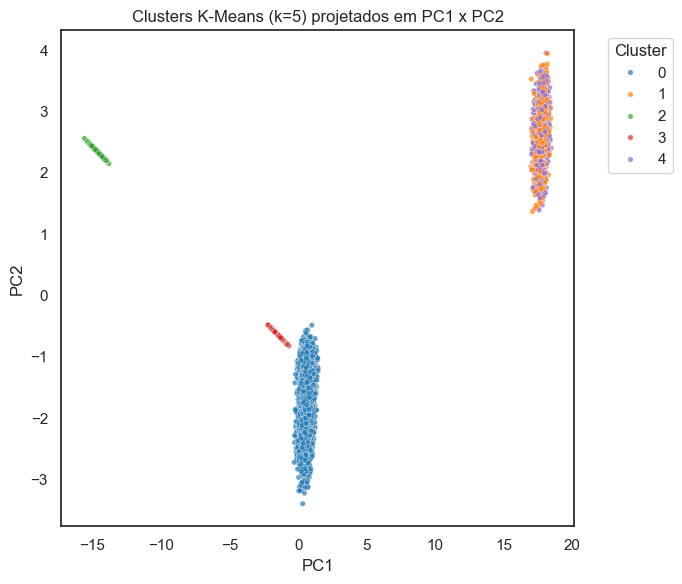

In [30]:
# CÉLULA 11
# ============================================
# Visualizar os clusters do K-Means em 2D (PC1 x PC2)
# ============================================

# PCA só para visualização em 2D
pca_2d = PCA(n_components=2, random_state=42)
X_all_2d = pca_2d.fit_transform(X_all_prep)

kmeans = clustering_algos["KMeans_k5"]
labels_km = kmeans.fit_predict(X_all_pca)  # usa PCA-10d para cluster, 2D só para plot

plt.figure(figsize=(7,6))
sns.scatterplot(
    x=X_all_2d[:, 0],
    y=X_all_2d[:, 1],
    hue=labels_km,
    palette='tab10',
    s=15,
    alpha=0.7,
    legend='full'
)
plt.title("Clusters K-Means (k=5) projetados em PC1 x PC2")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend(title="Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


MODELAGEM (APRENDIZADO PROFUNDO)

In [36]:
# CÉLULA 0
# ============================================
# Imports para Deep Learning e checagem de GPU
# ============================================

import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Verificar se há GPU disponível
gpus = tf.config.list_physical_devices('GPU')
print("Dispositivos GPU encontrados:", gpus)

if gpus:
    print("TensorFlow vai utilizar GPU (se o runtime estiver configurado para isso).")
else:
    print("Nenhuma GPU detectada. O treinamento será feito em CPU.")

Dispositivos GPU encontrados: []
Nenhuma GPU detectada. O treinamento será feito em CPU.


Preparar dados para DL (pré-processamento + reshape)

In [37]:
# CÉLULA 1
# ============================================
# Pré-processar dados para Deep Learning
# - Imputação + padronização (mesmo que modelos clássicos)
# - Preparar versões 2D (MLP) e 3D (CNN)
# ============================================

# Garante que X_train, X_test, y_train, y_test existam
# e que y_train/y_test estejam codificados em 0..4

# Aplica o pipeline de pré-processamento (ajusta no treino)
X_train_prep = preprocess_pipeline.fit_transform(X_train)
X_test_prep  = preprocess_pipeline.transform(X_test)

print("Shape X_train_prep:", X_train_prep.shape)
print("Shape X_test_prep :", X_test_prep.shape)

# Para MLP: usamos X_train_prep e X_test_prep diretamente (2D: [n_amostras, n_features])

# Para CNN 1D: precisamos de shape [n_amostras, n_features, 1]
X_train_cnn = X_train_prep[..., np.newaxis]  # adiciona canal
X_test_cnn  = X_test_prep[..., np.newaxis]

print("Shape X_train_cnn:", X_train_cnn.shape)
print("Shape X_test_cnn :", X_test_cnn.shape)

n_features = X_train_prep.shape[1]
n_classes = len(np.unique(y_train))
print("Número de features:", n_features)
print("Número de classes:", n_classes)

Shape X_train_prep: (14586, 115)
Shape X_test_prep : (3647, 115)
Shape X_train_cnn: (14586, 115, 1)
Shape X_test_cnn : (3647, 115, 1)
Número de features: 115
Número de classes: 5


Função utilitária para avaliar modelos DL

In [38]:
# CÉLULA 2
# ============================================
# Função auxiliar para avaliar modelos de DL
# ============================================

def avaliar_modelo_dl(model, X_test, y_test, classes_orig=None, nome_modelo="Modelo_DL"):
    """
    Faz predição no conjunto de teste, calcula:
    - acurácia
    - precisão macro
    - recall macro
    - F1 macro
    E imprime classification_report.
    """
    # Probabilidades ou logits -> pred classe
    y_proba = model.predict(X_test)
    y_pred = np.argmax(y_proba, axis=1)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro', zero_division=0)
    rec = recall_score(y_test, y_pred, average='macro', zero_division=0)
    f1 = f1_score(y_test, y_pred, average='macro', zero_division=0)

    print(f"\n>>> Desempenho no teste – {nome_modelo}")
    print(f"Acurácia      : {acc:.4f}")
    print(f"Precisão macro: {prec:.4f}")
    print(f"Recall macro  : {rec:.4f}")
    print(f"F1 macro      : {f1:.4f}")

    if classes_orig is not None:
        target_names = [f"Classe {c}" for c in classes_orig]
        print("\nClassification report:")
        print(classification_report(y_test, y_pred, target_names=target_names, digits=4))
    else:
        print("\nClassification report:")
        print(classification_report(y_test, y_pred, digits=4))

    return {
        "modelo": nome_modelo,
        "acc": acc,
        "precision_macro": prec,
        "recall_macro": rec,
        "f1_macro": f1
    }

Modelo 1: MLP (baseline Deep)

In [39]:
# CÉLULA 3
# ============================================
# Modelo 1 – MLP (Perceptron Multicamadas)
# ============================================

def build_mlp(input_dim, n_classes):
    model = keras.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(n_classes, activation='softmax')
    ])
    return model

mlp_model = build_mlp(n_features, n_classes)

mlp_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

mlp_model.summary()

# Callbacks: EarlyStopping para evitar overfitting
early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history_mlp = mlp_model.fit(
    X_train_prep, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Avaliação no conjunto de teste
res_mlp = avaliar_modelo_dl(
    mlp_model,
    X_test_prep,
    y_test,
    classes_orig=classes_orig,
    nome_modelo="MLP"
)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        29,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 63,237 (247.02 KB)

 Trainable params: 63,237 (247.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7316 - loss: 0.5989 - val_accuracy: 0.9647 - val_loss: 0.1209
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9577 - loss: 0.1279 - val_accuracy: 0.9791 - val_loss: 0.0829
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.0932 - val_accuracy: 0.9808 - val_loss: 0.0746
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9789 - loss: 0.0750 - val_accuracy: 0.9815 - val_loss: 0.0674
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9821 - loss: 0.0656 - val_accuracy: 0.9794 - val_loss: 0.0703
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9845 - loss: 0.0537 - val_accuracy: 0.9815 - val_loss: 0.0673
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9896 - loss: 0.0383 - val_accuracy: 0.9859 - val_loss: 0.0531
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9904 - loss: 0.0335 - val_accuracy: 0.

Modelo 2: CNN 1D

In [40]:
# CÉLULA 4
# ============================================
# Modelo 2 – CNN 1D sobre o espectro
# ============================================

def build_cnn1d(input_length, n_classes):
    inputs = keras.Input(shape=(input_length, 1))

    x = layers.Conv1D(32, kernel_size=5, padding='same', activation='relu')(inputs)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(x)
    x = layers.MaxPooling1D(pool_size=2)(x)

    x = layers.Conv1D(128, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling1D()(x)

    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(n_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

cnn1d_model = build_cnn1d(n_features, n_classes)

cnn1d_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn1d_model.summary()

early_stop_cnn = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history_cnn1d = cnn1d_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop_cnn],
    verbose=1
)

# Avaliação no teste
res_cnn1d = avaliar_modelo_dl(
    cnn1d_model,
    X_test_cnn,
    y_test,
    classes_orig=classes_orig,
    nome_modelo="CNN1D"
)

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 115, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 115, 32)        │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 57, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 57, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 28, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 28, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,357 (204.52 KB)

 Trainable params: 52,357 (204.52 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6829 - loss: 0.7477 - val_accuracy: 0.8804 - val_loss: 0.2325
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9281 - loss: 0.1783 - val_accuracy: 0.9685 - val_loss: 0.0912
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9643 - loss: 0.1038 - val_accuracy: 0.9729 - val_loss: 0.0665
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9798 - loss: 0.0643 - val_accuracy: 0.9880 - val_loss: 0.0350
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9868 - loss: 0.0419 - val_accuracy: 0.9928 - val_loss: 0.0202
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9929 - loss: 0.0276 - val_accuracy: 0.9955 - val_loss: 0.0135
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9960 - loss: 0.0152 - val_accuracy: 0.9962 - val_loss: 0.0107
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9955 - loss: 0.0160 - val_accuracy: 0.

Modelo 3: CNN 1D + Self-Attention

In [41]:
# CÉLULA 5
# ============================================
# Modelo 3 – CNN 1D + Self-Attention
# ============================================

from tensorflow.keras.layers import MultiHeadAttention

def build_cnn1d_attention(input_length, n_classes, num_heads=4, key_dim=32):
    inputs = keras.Input(shape=(input_length, 1))

    # Extrator de features locais
    x = layers.Conv1D(64, kernel_size=5, padding='same', activation='relu')(inputs)
    x = layers.LayerNormalization()(x)

    # Self-Attention: a sequência "se olha"
    attn_output = MultiHeadAttention(num_heads=num_heads, key_dim=key_dim)(
        x, x
    )
    x = layers.Add()([x, attn_output])      # residual
    x = layers.LayerNormalization()(x)

    # Pooling global
    x = layers.GlobalAveragePooling1D()(x)

    # Camada densa final
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    outputs = layers.Dense(n_classes, activation='softmax')(x)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

cnn_att_model = build_cnn1d_attention(n_features, n_classes)

cnn_att_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

cnn_att_model.summary()

early_stop_att = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=7,
    restore_best_weights=True
)

history_cnn_att = cnn_att_model.fit(
    X_train_cnn, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=64,
    callbacks=[early_stop_att],
    verbose=1
)

# Avaliação no teste
res_cnn_att = avaliar_modelo_dl(
    cnn_att_model,
    X_test_cnn,
    y_test,
    classes_orig=classes_orig,
    nome_modelo="CNN1D+Attention"
)

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 115, 1)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 115, 64)   │        384 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalization │ (None, 115, 64)   │        128 │ conv1d_3[0][0]    │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multi_head_attenti… │ (None, 115, 64)   │     33,216 │ layer_normalizat… │
│ (MultiHeadAttentio… │                   │            │ layer_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 115, 64)   │          0 │ layer_normalizat… │
│                     │                   │            │ multi_head_atten… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer_normalizatio… │ (None, 115, 64)   │        128 │ add[0][0]         │
│ (LayerNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ global_average_poo… │ (None, 64)        │          0 │ layer_normalizat… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 128)       │      8,320 │ global_average_p… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_4 (Dropout) │ (None, 128)       │          0 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 5)         │        645 │ dropout_4[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 42,821 (167.27 KB)

 Trainable params: 42,821 (167.27 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.7251 - loss: 0.5709 - val_accuracy: 0.9856 - val_loss: 0.0399
Epoch 2/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9909 - loss: 0.0386 - val_accuracy: 0.9949 - val_loss: 0.0142
Epoch 3/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9974 - loss: 0.0111 - val_accuracy: 0.9979 - val_loss: 0.0079
Epoch 4/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9981 - loss: 0.0086 - val_accuracy: 0.9976 - val_loss: 0.0089
Epoch 5/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9977 - loss: 0.0085 - val_accuracy: 0.9993 - val_loss: 0.0018
Epoch 6/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9995 - loss: 0.0019 - val_accuracy: 0.9997 - val_loss: 8.9559e-04
Epoch 7/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 32ms/step - accuracy: 0.9996 - loss: 0.0011 - val_accuracy: 0.9997 - val_loss: 9.2925e-04
Epoch 8/50
183/183 ━━━━━━━━━━━━━━━━━━━━ 6s 33ms/step - accuracy: 0.9997 - loss: 0.0012 - 

Comparar modelos clássicos x DL nas mesmas métricas

In [42]:
# CÉLULA 6
# ============================================
# Comparar modelos clássicos x modelos de Deep Learning
# ============================================

import pandas as pd

# Resultados dos modelos de DL (já calculados com avaliar_modelo_dl)
resultados_dl = pd.DataFrame([
    res_mlp,
    res_cnn1d,
    res_cnn_att
])

print("Resultados Deep Learning:")
display(resultados_dl)

# Se quiser, extrair apenas as colunas principais dos clássicos
# (ajuste nomes de colunas conforme seu resultados_sup_df)
cols_classicos = ['modelo', 'acc_media', 'f1_macro_media']
print("Resultados modelos clássicos (resumo):")
display(resultados_sup_df[cols_classicos])

# Opcional: renomear para combinar com DL e concatenar
classicos_convertidos = resultados_sup_df.copy()
classicos_convertidos = classicos_convertidos.rename(columns={
    'acc_media': 'acc',
    'f1_macro_media': 'f1_macro'
})
classicos_convertidos = classicos_convertidos[['modelo', 'acc', 'f1_macro']]

dl_convertidos = resultados_dl[['modelo', 'acc', 'f1_macro']]

comparacao = pd.concat([classicos_convertidos, dl_convertidos], ignore_index=True)
print("Comparação geral (clássicos + DL):")
display(comparacao.sort_values(by='f1_macro', ascending=False))

Resultados Deep Learning:


,modelo,acc,precision_macro,recall_macro,f1_macro
0,MLP,0.992597,0.993958,0.994532,0.994177
1,CNN1D,1.000000,1.000000,1.000000,1.000000
2,CNN1D+Attention,1.000000,1.000000,1.000000,1.000000


Resultados modelos clássicos (resumo):


,modelo,acc_media,f1_macro_media
0,GaussianNB,1.000000,1.000000
1,RandomForest,1.000000,1.000000
2,XGBoost,1.000000,1.000000
3,LightGBM,1.000000,1.000000
4,CatBoost,1.000000,1.000000
5,GradientBoosting,0.999863,0.999845
6,DecisionTree,0.999314,0.999206
7,SVM_RBF,0.986014,0.989119
8,LogisticRegression,0.984711,0.988107
9,KNN,0.924380,0.940728


Comparação geral (clássicos + DL):


,modelo,acc,f1_macro
0,GaussianNB,1.000000,1.000000
1,RandomForest,1.000000,1.000000
2,XGBoost,1.000000,1.000000
3,LightGBM,1.000000,1.000000
4,CatBoost,1.000000,1.000000
12,CNN1D,1.000000,1.000000
13,CNN1D+Attention,1.000000,1.000000
5,GradientBoosting,0.999863,0.999845
6,DecisionTree,0.999314,0.999206
11,MLP,0.992597,0.994177
